In [147]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt

In [2]:
#Reading necessary data files
df= pd.read_csv("all3_ML.csv")

sono= pd.read_csv("Sonoma_ML.csv")
coast= pd.read_csv("Coast_ML.csv")
valley= pd.read_csv("Valley_ML.csv")

In [3]:
ysono =  sono["Rating"]

In [4]:
Xsono = sono.iloc[:,2:] #Features start on column 2

In [5]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0) #Filling in NaNs with the mean of the column
imp.fit(Xsono)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [6]:
fillX = imp.transform(Xsono)

In [92]:
trainX = fillX[:17]

In [93]:
testX = fillX[17:]

In [94]:
ytrain = ysono[:17]

In [115]:
svr_lin = SVR(kernel='linear', C=0.1)

In [116]:
y_lin = svr_lin.fit(trainX, ytrain)

In [117]:
train_predict = y_lin.predict(trainX)

In [118]:
test_predict = y_lin.predict(testX)

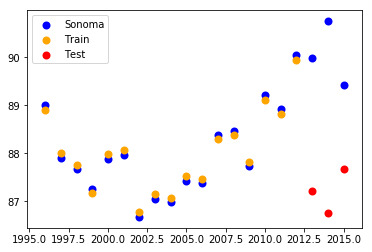

In [119]:
plt.close("all")


plt.scatter(years, df.iloc[:20,1], color="b", lw=2, label="Sonoma")
plt.scatter(years[:17], train_predict, color="orange", lw=2, label="Train")
plt.scatter(years[17:], test_predict, color="red", lw=2, label="Test")

plt.legend()
plt.show()

In [143]:
ridgereg = Ridge(alpha=0.000001,normalize=True)

In [144]:
y_ridge = ridgereg.fit(trainX, ytrain)

In [145]:
rtrain_predict = y_ridge.predict(trainX)
rtest_predict = y_ridge.predict(testX)

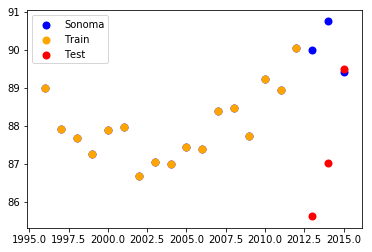

In [146]:
plt.close("all")


plt.scatter(years, df.iloc[:20,1], color="b", lw=2, label="Sonoma")
plt.scatter(years[:17], rtrain_predict, color="orange", lw=2, label="Train")
plt.scatter(years[17:], rtest_predict, color="red", lw=2, label="Test")

plt.legend()
plt.show()